In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline
plt.style.use('ggplot')

In [4]:
start = pd.to_datetime('2012-01-01')  #NOTE: datetime.datetime is for matplotlib
end = pd.to_datetime('2017-01-01')

In [5]:
#Importing only the CLosing Stock Values from Quandl
aapl = quandl.get("WIKI/AAPL.11",start_date = start, end_date = end, )
cisco = quandl.get("WIKI/CSCO.11",start_date = start, end_date = end, )
ibm = quandl.get("WIKI/IBM.11",start_date = start, end_date = end, )
amzn = quandl.get("WIKI/AMZN.11",start_date = start, end_date = end, )

In [6]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [7]:
#seeing the first closing stock value of aapl
aapl.iloc[0]['Adj. Close']

52.848786580038

In [ ]:
#Now lets add the normalized(i.e. cumulative) reutrn of stocks

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [10]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [12]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


Now let's Say for Portfolio Analysis I need to "have" a model portfolio first(LOL)<br>
Say My Portfolio is as Follow:<br>
30% Apple<br>
15% Cisco<br>
15% IBM<br>
40% Amazon



#### Now say I invest x amount of money so lets see at given Cumulative returns of all the stock what is "my" Return at the end of each day


In [13]:
for (stock_df, rate) in zip([aapl,cisco,ibm,amzn],[.3,.15,.15,.4]):
    stock_df['Allocation'] = stock_df['Normed Return']*rate

In [14]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


### Let's say I invest a MILLION DOLLARS let's what I will make at the end at the given PORTFOLIO ALLOCATION

In [15]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Positional Vals'] = stock_df['Allocation']*1000000

In [16]:
cisco.head()

,Adj. Close,Normed Return,Allocation,Positional Vals
Date,,,,
2012-01-03,15.617341,1.000000,0.150000,150000.000000
2012-01-04,15.919125,1.019324,0.152899,152898.550725
2012-01-05,15.860445,1.015566,0.152335,152334.943639
2012-01-06,15.801764,1.011809,0.151771,151771.336554
2012-01-09,15.902359,1.018250,0.152738,152737.520129


In [17]:
all_pos = [aapl['Positional Vals'], cisco['Positional Vals'], ibm['Positional Vals'], amzn['Positional Vals']]
Pos_vals = pd.concat(all_pos,axis=1)

In [19]:
Pos_vals.columns = ['AAPLE Pos', 'CISCO Pos', 'IBM Pos', 'AMAZON Pos']

In [20]:
Pos_vals.head()

,AAPLE Pos,CISCO Pos,IBM Pos,AMAZON Pos
Date,,,,
2012-01-03,300000.000000,150000.000000,150000.000000,400000.000000
2012-01-04,301612.236461,152898.550725,149388.083736,396603.921131
2012-01-05,304960.727573,152334.943639,148679.549114,396827.347372
2012-01-06,308148.724558,151771.336554,146972.624799,407998.659443
2012-01-09,307659.946988,152737.520129,146207.729469,398949.896665


### Let's see what I would make each day at the given PORTFOLIO ALLOCATION

In [23]:
Pos_vals['Net Money'] = Pos_vals.sum(axis=1)

In [24]:
Pos_vals.head()

,AAPLE Pos,CISCO Pos,IBM Pos,AMAZON Pos,Net Money
Date,,,,,
2012-01-03,300000.000000,150000.000000,150000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,152898.550725,149388.083736,396603.921131,1.000503e+06
2012-01-05,304960.727573,152334.943639,148679.549114,396827.347372,1.002803e+06
2012-01-06,308148.724558,151771.336554,146972.624799,407998.659443,1.014891e+06
2012-01-09,307659.946988,152737.520129,146207.729469,398949.896665,1.005555e+06


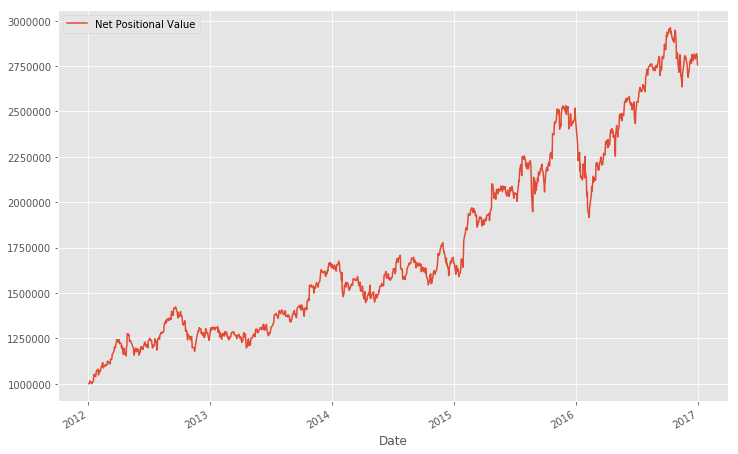

In [27]:
Pos_vals['Net Money'].plot(figsize=(12,8), label="Net Positional Value")
plt.legend()

In [28]:
# Given at this rate lets see when would I have made the most money
Pos_vals['Net Money'].idxmax()  #MAX PROFIT <3

Timestamp('2016-10-10 00:00:00')

### Lets see the firm wise contribution

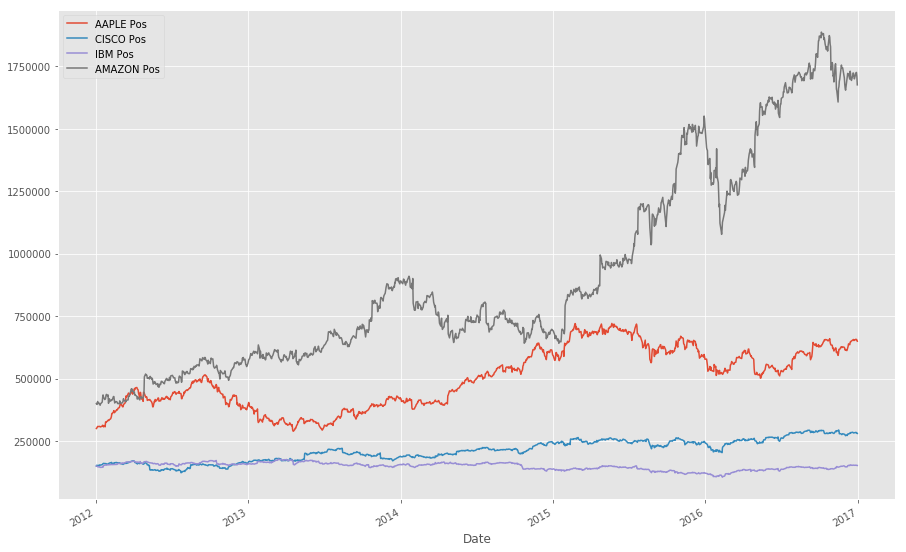

In [31]:
Pos_vals.drop('Net Money',axis=1).plot(figsize=(15,10))

### Now this maybe because of my portfolio allocation lets rather see the unbiased cumulative returns!

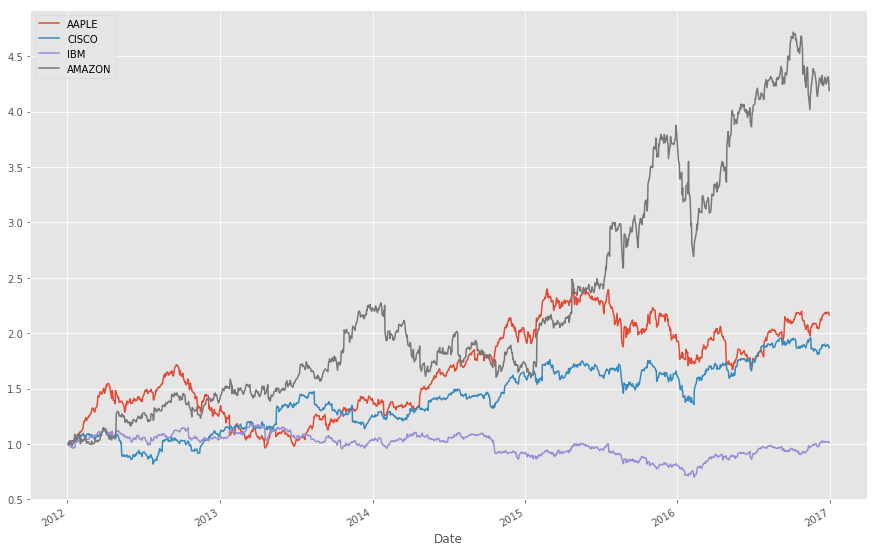

In [34]:
aapl['Normed Return'].plot(figsize=(15,10),label="AAPLE")
cisco['Normed Return'].plot(figsize=(15,10),label="CISCO")
ibm['Normed Return'].plot(figsize=(15,10),label="IBM")
amzn['Normed Return'].plot(figsize=(15,10),label="AMAZON")
plt.legend()

# I did say I was right investing in Amazon after-all!

### Calculate Sharpe Ratio for Portfolio Optimisation

In [35]:
Pos_vals['Daily Return'] = Pos_vals['Net Money'].pct_change(1)

In [36]:
Pos_vals.head()

,AAPLE Pos,CISCO Pos,IBM Pos,AMAZON Pos,Net Money,Daily Return
Date,,,,,,
2012-01-03,300000.000000,150000.000000,150000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,152898.550725,149388.083736,396603.921131,1.000503e+06,0.000503
2012-01-05,304960.727573,152334.943639,148679.549114,396827.347372,1.002803e+06,0.002299
2012-01-06,308148.724558,151771.336554,146972.624799,407998.659443,1.014891e+06,0.012055
2012-01-09,307659.946988,152737.520129,146207.729469,398949.896665,1.005555e+06,-0.009199


In [37]:
SR = Pos_vals["Daily Return"].mean() / Pos_vals["Daily Return"].std()

In [38]:
SR

0.06903018296035475

In [39]:
ASR = (252**0.5) * SR

In [40]:
ASR

4383.692738714368